



# Question. 3

Feed the following paragraph into your favourite data analytics tool, and answer the following;

a. What is the probability of the word “data” occurring in each line ?

b. What is the distribution of distinct word counts across all the lines ?

c. What is the probability of the word “analytics” occurring after the word “data” ?

========================================================================================================================

As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), 
reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view.

===========================================================================================================================



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk import word_tokenize
from nltk.probability import FreqDist
from collections import Counter 

In [2]:
#load file
file = open("text.txt")
paragraphs= file.read()


In [3]:
# function for cleaning text

def text_processing_ori(message):
    ## check punctuation 
    no_punctuation_text = [item for item in message if item not in string.punctuation]
   
    ## join no punctuation text 
    no_punctuation_text = ''.join(no_punctuation_text)
    return no_punctuation_text

text= text_processing_ori(paragraphs).lower()
new_text=text.split('\n')

#### a. What is the probability of the word “data” occurring in each line ?

In [4]:
#split sentences into word
# count the frequency of word  

token_words = []
count = []

for i in range(len(new_text)):    
    token_words.append(word_tokenize(new_text[i]))
    
for i in range(len(token_words)):
    count.append(FreqDist(token_words[i]))
    prob= round(count[i]['data']/len(count[i]),2)   
    print(f'The probability of the word "data" occuring in line {i+  1} is {prob}')  

The probability of the word "data" occuring in line 1 is 0.07
The probability of the word "data" occuring in line 2 is 0.0
The probability of the word "data" occuring in line 3 is 0.0
The probability of the word "data" occuring in line 4 is 0.08
The probability of the word "data" occuring in line 5 is 0.07
The probability of the word "data" occuring in line 6 is 0.08
The probability of the word "data" occuring in line 7 is 0.08
The probability of the word "data" occuring in line 8 is 0.0
The probability of the word "data" occuring in line 9 is 0.0
The probability of the word "data" occuring in line 10 is 0.0
The probability of the word "data" occuring in line 11 is 0.07
The probability of the word "data" occuring in line 12 is 0.0
The probability of the word "data" occuring in line 13 is 0.14
The probability of the word "data" occuring in line 14 is 0.15
The probability of the word "data" occuring in line 15 is 0.08
The probability of the word "data" occuring in line 16 is 0.06
The pro

#### b. What is the distribution of distinct word counts across all the lines ?

In [5]:
#calculating the unique word of each line
uniques = []
for i in range(len(new_text)):
    uniques.append(len(set(new_text[i].split())))

#create dataframe    
df= pd.DataFrame(uniques, columns=['Unique'])
df.head()

,Unique
0,14
1,13
2,12
3,13
4,15


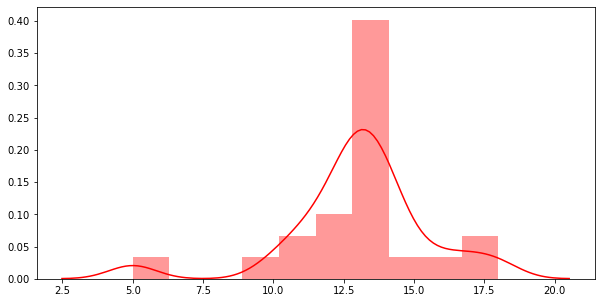

In [6]:
#ditribution of unique word
plt.figure(figsize =(10,5))
sns.distplot(df, color='red', kde=True);

#### c. What is the probability of the word “analytics” occurring after the word “data” ?

In [25]:
vectorizer = CountVectorizer(ngram_range = (1,2))

matrix = vectorizer.fit_transform(new_text)
df = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
df.head(5)

,1977,1977 book,about,about data,addition,addition it,advanced,advanced analytics,aims,aims to,...,which aims,which applies,while,while data,with,with quantifiable,with the,work,work of,work while
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [26]:
#Prob= The number of times data analytics appear together/The total number of times data appear alone

prob= (df['data analytics'].sum()/df['data'].sum())

print(f'So the probabilities of the occurrences of the words  “analytics” after "data" sequences is {prob}') 


So the probabilities of the occurrences of the words  “analytics” after "data" sequences is 0.3333333333333333
